## <a id='toc1_1_'></a>[**Preparación de datos con Dataset de Prescripciones del mercado farmacéutico Colombiano**](#toc0_)

**Tabla de Contenido**<a id='toc0_'></a>    
- [**Preparación de datos con Dataset de Prescripciones del mercado farmacéutico Colombiano**](#toc1_1_)    
    - [**Contexto y Pregunta SMART**](#toc1_1_1_)    
      - [**Contexto**](#toc1_1_1_1_)    
      - [**Pregunta SMART**](#toc1_1_1_2_)    
      - [**Justificación de por que esta pregunta SMART se puede solucionar mediante Ciencia de datos o IA**](#toc1_1_1_3_)    
    - [**Análisis Exploratorio**](#toc1_1_2_)    
      - [**Cargue de los datos**](#toc1_1_2_1_)    
        - [**Alistamiento Dimensión de Producto**](#toc1_1_2_1_1_)    
        - [**Alistamiento de Dataframe Completo**](#toc1_1_2_1_2_)    
      - [**Análisis de la estructura**](#toc1_1_2_2_)    
      - [**Análisis de las variables Categóricas**](#toc1_1_2_3_)    
      - [**Análisis de las variables Enteras**](#toc1_1_2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[**Contexto y Pregunta SMART**](#toc0_)

#### <a id='toc1_1_1_1_'></a>[**Contexto**](#toc0_)

En TQ Confiable, la comunicación masiva de los productos de la división Farma Ética se realiza principalmente mediante la inversión en visitas médicas. Existe un área que puntualmente se llama "Visita Médica" y su labor es informar de manera efectiva a médicos sobre las novedades y ventajas de los productos de la empresa, con el objetivo de promover su prescripción y recomendación. Sin embargo, los informes de recetas médicas de los últimos meses han revelado que la participación de TQ en el mercado farmacéutico Colombiano ha disminuido en 0.2 puntos porcentuales, mientras que la competencia se ha mantenido estable o, en algunos casos, ha incrementado su participación.

#### <a id='toc1_1_1_2_'></a>[**Pregunta SMART**](#toc0_)

¿Qué productos han absorbido la participación de mercado perdida por TQ en los principales segmentos de mercado que representen el 80% del mercado farmacéutico total en Colombia, durante los últimos seis meses?

#### <a id='toc1_1_1_3_'></a>[**Justificación de por que esta pregunta SMART se puede solucionar mediante Ciencia de datos o IA**](#toc0_)

TQ cuenta con la información de prescripciones en el mercado a nivel de audiencia (especialidad de médicos) y producto, tanto de productos propios como de la competencia, por lo que para identificar qué productos han absorbido la participación de mercado perdida por TQ en los principales segmentos, se puede usar ciencia de datos e IA para analizar los cambios en la participación de mercado a lo largo del tiempo. Esto podría implicar modelar tendencias y patrones con análisis de series de tiempo, aplicar modelos de machine learning para identificar correlaciones entre la pérdida de TQ y el crecimiento de competidores, y segmentar el mercado para enfocarse en los segmentos más críticos. Estas técnicas permiten obtener insights precisos sobre el comportamiento del mercado y tomar decisiones informadas.

En resumen, la combinación de análisis de datos exploratorio, segmentación de mercado, modelado de series de tiempo, y técnicas de machine learning permitirá
responder a la pregunta SMART de manera precisa, y además, ofrecer una visión integral basada en datos sobre el comportamiento del mercado.

### <a id='toc1_1_2_'></a>[**Análisis Exploratorio**](#toc0_)

#### <a id='toc1_1_2_1_'></a>[**Cargue de los datos**](#toc0_)

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import os

# Matplotlib y  seaborn para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.dpi'] = 200

#from google.colab import drive

""" Cargar Dataframes desde Google Drive
drive.mount('/content/drive', force_remount=True)
df_category = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analisis Exploratorio de Datos/Bases/Market COL Jun/Category.xlsx', engine='openpyxl', dtype=str)
df_producto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis Exploratorio de Datos/Bases/Market COL Jun/CUP_PRODUTO.TXT', sep='	', encoding='latin1', dtype=str)
df_molecula = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis Exploratorio de Datos/Bases/Market COL Jun/CUP_MOLECULA.TXT', sep='	', encoding='latin1', dtype=str)
df_laboratorio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis Exploratorio de Datos/Bases/Market COL Jun/CUP_LABORATORIO.TXT', sep='	', encoding='latin1', dtype=str)
df_concentracion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis Exploratorio de Datos/Bases/Market COL Jun/CUP_CONCENTRACAO.TXT', sep='	', encoding='latin1', dtype=str)
df_especialidades = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis Exploratorio de Datos/Bases/Market COL Jun/CUP_ESPECIALIDADE.TXT', sep='	', encoding='latin1', dtype=str)
df_prescripciones = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis Exploratorio de Datos/Bases/Market COL Jun/CUP_FATO.TXT', sep='	', encoding='latin1', dtype=str)

"""
# Cargar Dataframes desde máquina local
df_category = pd.read_excel(os.path.join(os.getcwd() + "\Bases", "Category.xlsx"), engine='openpyxl', dtype=str)
df_clase = pd.read_csv(os.path.join(os.getcwd() + "\Bases", "CUP_CLASSE.TXT"), sep='	', encoding='latin1', dtype=str)
df_producto = pd.read_csv(os.path.join(os.getcwd() + "\Bases", "CUP_PRODUTO.TXT"), sep='	', encoding='latin1', dtype=str)
df_molecula = pd.read_csv(os.path.join(os.getcwd() + "\Bases", "CUP_MOLECULA.TXT"), sep='	', encoding='latin1', dtype=str)
df_laboratorio = pd.read_csv(os.path.join(os.getcwd() + "\Bases", "CUP_LABORATORIO.TXT"), sep='	', encoding='latin1', dtype=str)
df_concentracion = pd.read_csv(os.path.join(os.getcwd() + "\Bases", "CUP_CONCENTRACAO.TXT"), sep='	', encoding='latin1', dtype=str)
df_especialidades = pd.read_csv(os.path.join(os.getcwd() + "\Bases", "CUP_ESPECIALIDADE.TXT"), sep='	', encoding='latin1', dtype=str)
df_prescripciones = pd.read_csv(os.path.join(os.getcwd() + "\Bases", "CUP_FATO.TXT"), sep='	', encoding='latin1', dtype=str)


##### <a id='toc1_1_2_1_1_'></a>[**Alistamiento Dimensión de Producto**](#toc0_)

Se realiza un alistamiento y transformación de los archivos cargados asociados a la **dimensión de producto** para poder analizar múltiples variables en el periodo de tiempo indicado en la pregunta SMART, particularmente se cruzan los diferentes archivos con todos los atributos para dejarlos en un único dataframe

In [2]:
cols_producto = ['PRO_ID', 'NOMB_PRODUCT', 'MARCA_ID', 'NOMB_MARCA', 'CON_ID', 'CON_DESC', 'MOL_ID', 'MOL_DESC', 'CT4_ID', 'CT4_DESC', 'LAB_ID', 'LAB_DESC']
df_producto['CTIV_ID'] = df_producto['CTIV_ID'].str.pad(width=5, side='right', fillchar='0')
df_producto_completo = pd.merge(df_producto, df_clase, how='inner', left_on='CTIV_ID', right_on='CT4_ID')
df_producto_completo = pd.merge(df_producto_completo, df_laboratorio, how='inner', left_on='PRO_LAB_ID', right_on='LAB_ID')
df_producto_completo = pd.merge(df_producto_completo, df_molecula, how='inner', on='MOL_ID')
df_producto_completo = pd.merge(df_producto_completo, df_concentracion, how='inner', left_on='CONCEN_ID', right_on='CON_ID')
df_producto_completo = df_producto_completo[cols_producto]
df_producto_completo = pd.merge(df_producto_completo, df_category, how = 'inner', on='PRO_ID')
del cols_producto, df_producto, df_clase, df_laboratorio, df_molecula, df_concentracion, df_category

##### <a id='toc1_1_2_1_2_'></a>[**Alistamiento de Dataframe Completo**](#toc0_)

Para un mejor análisis, se procede a cruzar el archivo de Rx con el dataframe de producto, y se filtran los meses de interés y los productos que conforman el mercado farmacéutico (Aquellos que en su categoría farma son Base ética o Base OTC)

In [3]:
# Alistamiento de Dataframe de Rx's
col_descriptivas = df_prescripciones.columns[:df_prescripciones.columns.get_loc('ESP_ID') + 1].tolist()
col_meses = df_prescripciones.columns[df_prescripciones.columns.get_loc('ESP_ID') + 1:].tolist()
df_prescripciones[col_meses] = df_prescripciones[col_meses].astype(int)

df_prescripciones = df_prescripciones.groupby(col_descriptivas)[col_meses].sum().reset_index()
df_prescripciones = pd.melt(df_prescripciones, id_vars=col_descriptivas, var_name='PERIODO', value_name='VALOR')
df_prescripciones = df_prescripciones[df_prescripciones['VALOR'] != 0]

meses = {
  'MES59' : '202406',
  'MES58' : '202405',
  'MES57' : '202404',
  'MES56' : '202403',
  'MES55' : '202402',
  'MES54' : '202401'}

# Cruce de Prescripciones con Producto y filtrado de periodos de tiempo indicado en la pregunta SMART
df_prescripciones = pd.merge(df_prescripciones, df_producto_completo, how='inner', on='PRO_ID')
df_prescripciones = pd.merge(df_prescripciones, df_especialidades, how='inner', on='ESP_ID')
df_prescripciones = df_prescripciones[df_prescripciones['PERIODO'].isin(['MES59', 'MES58', 'MES57', 'MES56', 'MES55', 'MES54'])]
df_prescripciones = df_prescripciones[df_prescripciones['CATEGORIA_FARMA'].isin(['Base Etica', 'Base OTC'])]
df_prescripciones['PERIODO'] = df_prescripciones['PERIODO'].replace(meses)
del meses, df_especialidades, col_descriptivas, col_meses, df_producto_completo

*Con el fin de analizar mejor la información, se agrupa el Dataframe por Laboratorio y se extraen las características mas relevantes*

In [4]:
# Se agrupa la información para tener un Dataframe multivariable del cual se pueda realizar un análisis estadístico
df_prescripciones = (
    df_prescripciones.groupby(['PERIODO','ESP_DESC', 'LAB_DESC', 'MOL_DESC', 'ETICO_POPULAR','MARCA_GENERICO'])
    .agg(VALOR=('VALOR', 'sum'),
         NO_PRODUCTOS=('PRO_ID', 'nunique'),
         NO_CONCENTRACIONES=('CON_ID', 'nunique'),
         NO_CLASES_T=('CT4_ID', 'nunique'))
    .sort_values(by='VALOR', ascending=False)
    .reset_index()
    .rename(columns={'PERIODO': 'ID_MES',
                     'ESP_DESC': 'ESPECIALIDAD',
                     'LAB_DESC': 'LABORATORIO',
                     'MOL_DESC': 'MOLECULA',
                     'ETICO_POPULAR': 'ETICO_OTC'})
)

#### <a id='toc1_1_2_2_'></a>[**Análisis de la estructura**](#toc0_)

In [7]:
df_prescripciones.shape

(219605, 10)

Los datos cuentan con 219605 registros y 10 columnas

In [9]:
df_prescripciones.isna().sum()

ID_MES                0
ESPECIALIDAD          0
LABORATORIO           0
MOLECULA              0
ETICO_OTC             0
MARCA_GENERICO        0
VALOR                 0
NO_PRODUCTOS          0
NO_CONCENTRACIONES    0
NO_CLASES_T           0
dtype: int64

Observamos que no hay registros vaciós, esto se debe a que en el proceso de creación de este Dataframe se mitigaron estos posibles valores en 0.

In [10]:
list(df_prescripciones.columns)

['ID_MES',
 'ESPECIALIDAD',
 'LABORATORIO',
 'MOLECULA',
 'ETICO_OTC',
 'MARCA_GENERICO',
 'VALOR',
 'NO_PRODUCTOS',
 'NO_CONCENTRACIONES',
 'NO_CLASES_T']

Las columnas fueron seleccionadas y la información está filtrada por las prescripciones que componen el mercado farmacéutico, con estas columnas se va a determinar que conjunto de productos le está quitando participación a TQ.

In [11]:
df_prescripciones.head()

,ID_MES,ESPECIALIDAD,LABORATORIO,MOLECULA,ETICO_OTC,MARCA_GENERICO,VALOR,NO_PRODUCTOS,NO_CONCENTRACIONES,NO_CLASES_T
0,202406,MEDI.GENERAL,HALEON,ACETAMINOFENO = PARACETAMOL,Popular,Marca,4374,12,7,1
1,202405,MEDI.GENERAL,HALEON,ACETAMINOFENO = PARACETAMOL,Popular,Marca,3975,11,7,1
2,202402,MEDI.GENERAL,HALEON,ACETAMINOFENO = PARACETAMOL,Popular,Marca,3825,12,7,1
3,202401,MEDI.GENERAL,HALEON,ACETAMINOFENO = PARACETAMOL,Popular,Marca,3811,12,7,1
4,202403,MEDI.GENERAL,HALEON,ACETAMINOFENO = PARACETAMOL,Popular,Marca,3799,12,7,1


Se ve una muestra de la información que vamos a analizar, de la cual tenemos un campo de tiempo, 5 campos categóricos y 4 variables numéricas

#### <a id='toc1_1_2_3_'></a>[**Análisis de las variables Categóricas**](#toc0_)

Se procede a Analizar los campos de Clasificación de producto

In [15]:
print((df_prescripciones.value_counts('ETICO_OTC',normalize=True)*100).round(2).astype(str)+'%')
print((df_prescripciones.value_counts('MARCA_GENERICO',normalize=True)*100).round(2).astype(str)+'%')

ETICO_OTC
Etico      71.99%
Popular    19.61%
0           8.35%
ETICO       0.05%
Name: proportion, dtype: object
MARCA_GENERICO
Marca       68.9%
Generico    31.1%
marca       0.01%
Name: proportion, dtype: object


Se observa de que existen valores categóricos que están mal Clasificados en el Category, por lo que se procede a realizar la homologación de los valores atípicos en estos campos

In [17]:
df_prescripciones['ETICO_OTC'] = df_prescripciones['ETICO_OTC'].replace({'0': 'Sin Clasificar', 'ETICO': 'Etico'})
df_prescripciones['MARCA_GENERICO'] = df_prescripciones['MARCA_GENERICO'].replace({'marca': 'Marca'})
print((df_prescripciones.value_counts('ETICO_OTC',normalize=True)*100).round(2).astype(str)+'%')
print((df_prescripciones.value_counts('MARCA_GENERICO',normalize=True)*100).round(2).astype(str)+'%')

ETICO_OTC
Etico             72.04%
Popular           19.61%
Sin Clasificar     8.35%
Name: proportion, dtype: object
MARCA_GENERICO
Marca       68.9%
Generico    31.1%
Name: proportion, dtype: object


Se ajustan los valores categóricos de producto, agrupando los valores en categorías únicas

In [19]:
print((df_prescripciones.value_counts('ESPECIALIDAD',normalize=True)*100).round(2).astype(str)+'%')

ESPECIALIDAD
MEDI.GENERAL                      10.65%
MEDI.INTERNA                        5.8%
INSTITUCIONES                      5.29%
GINECOLOGIA                         5.1%
PEDIATRIA                          4.76%
DERMATOLOGIA                       4.04%
MEDICINA FAMILIAR                  3.99%
CIRUGIA                            3.38%
GASTROENTER.                       3.31%
CARDIOLOGIA                        3.29%
OTORRINOLAR.                       3.23%
ORTOPEDIA                          3.11%
PSIQUIATRIA                        2.83%
UROLOGIA                           2.69%
OFTALMOLOGIA                       2.51%
CIR.PLAST/RP                       2.43%
NEUROLOGIA                         2.41%
ENDOCRINOLOG                       2.34%
NEUMO-TISIOL                       2.26%
OPTOMETRIA                         1.94%
FISIATRIA                          1.64%
REUMATOLOGIA                       1.56%
NEFROL-DIALI                       1.52%
TR.INTENSIVA                       1.43%
ODO

Las especialidades están bien cruzadas, no se observan especialidades anómalas

In [22]:
print((df_prescripciones.value_counts('LABORATORIO',normalize=True)*100).round(2).astype(str)+'%')

LABORATORIO
LAB NO INDICADO    18.7%
MCKESSON           8.09%
TECNOQUIMICAS      4.62%
NOVAMED            3.38%
LAFRANCOL          3.09%
                   ...  
GILMEDICA           0.0%
ERON                0.0%
CARLON LTDA         0.0%
BAUSCH&LOMB         0.0%
BIOTEFAR            0.0%
Name: proportion, Length: 384, dtype: object


Existen 384 Laboratorios en esta muestra de datos, por lo que a través de un CSV se analiza que tampoco hay valores anómalos

#### <a id='toc1_1_2_4_'></a>[**Análisis de las variables Enteras**](#toc0_)

In [23]:
df_prescripciones[['VALOR', 'NO_PRODUCTOS', 'NO_CONCENTRACIONES', 'NO_CLASES_T']].describe()

,VALOR,NO_PRODUCTOS,NO_CONCENTRACIONES,NO_CLASES_T
count,219605.000000,219605.000000,219605.000000,219605.000000
mean,14.322251,1.335862,1.242249,1.024471
std,67.162790,0.926958,0.622133,0.256254
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000
75%,6.000000,1.000000,1.000000,1.000000
max,4374.000000,44.000000,11.000000,16.000000


Basándonos en los resultados numéricos, podemos inferir lo siguiente:

- Valores Atípicos: La columna 'VALOR' presenta una gran diferencia entre el valor máximo (4374) y el tercer cuartil (6). Esto sugiere la presencia de valores atípicos extremadamente altos que podrían distorsionar el análisis.

- Distribución Desigual: Las columnas 'NO_PRODUCTOS', 'NO_CONCENTRACIONES' y 'NO_CLASES_T' muestran una fuerte tendencia hacia valores bajos (1 en la mayoría de los casos). Esto indica que la mayoría de las prescripciones contienen un solo producto, una sola concentración y pertenecen a una sola clase terapéutica.

- Variabilidad: La columna 'VALOR' exhibe una desviación estándar considerable, lo que implica una alta variabilidad en los valores. Las otras columnas, en cambio, tienen una desviación estándar mucho menor, sugiriendo una menor variabilidad

- La mayoría de las prescripciones son relativamente simples, con un solo producto y una sola concentración.
El valor total de las prescripciones varía considerablemente, con algunos casos excepcionales de valores muy altos.

Se observa gráficamente lo descrito con los siguientes gráficos:

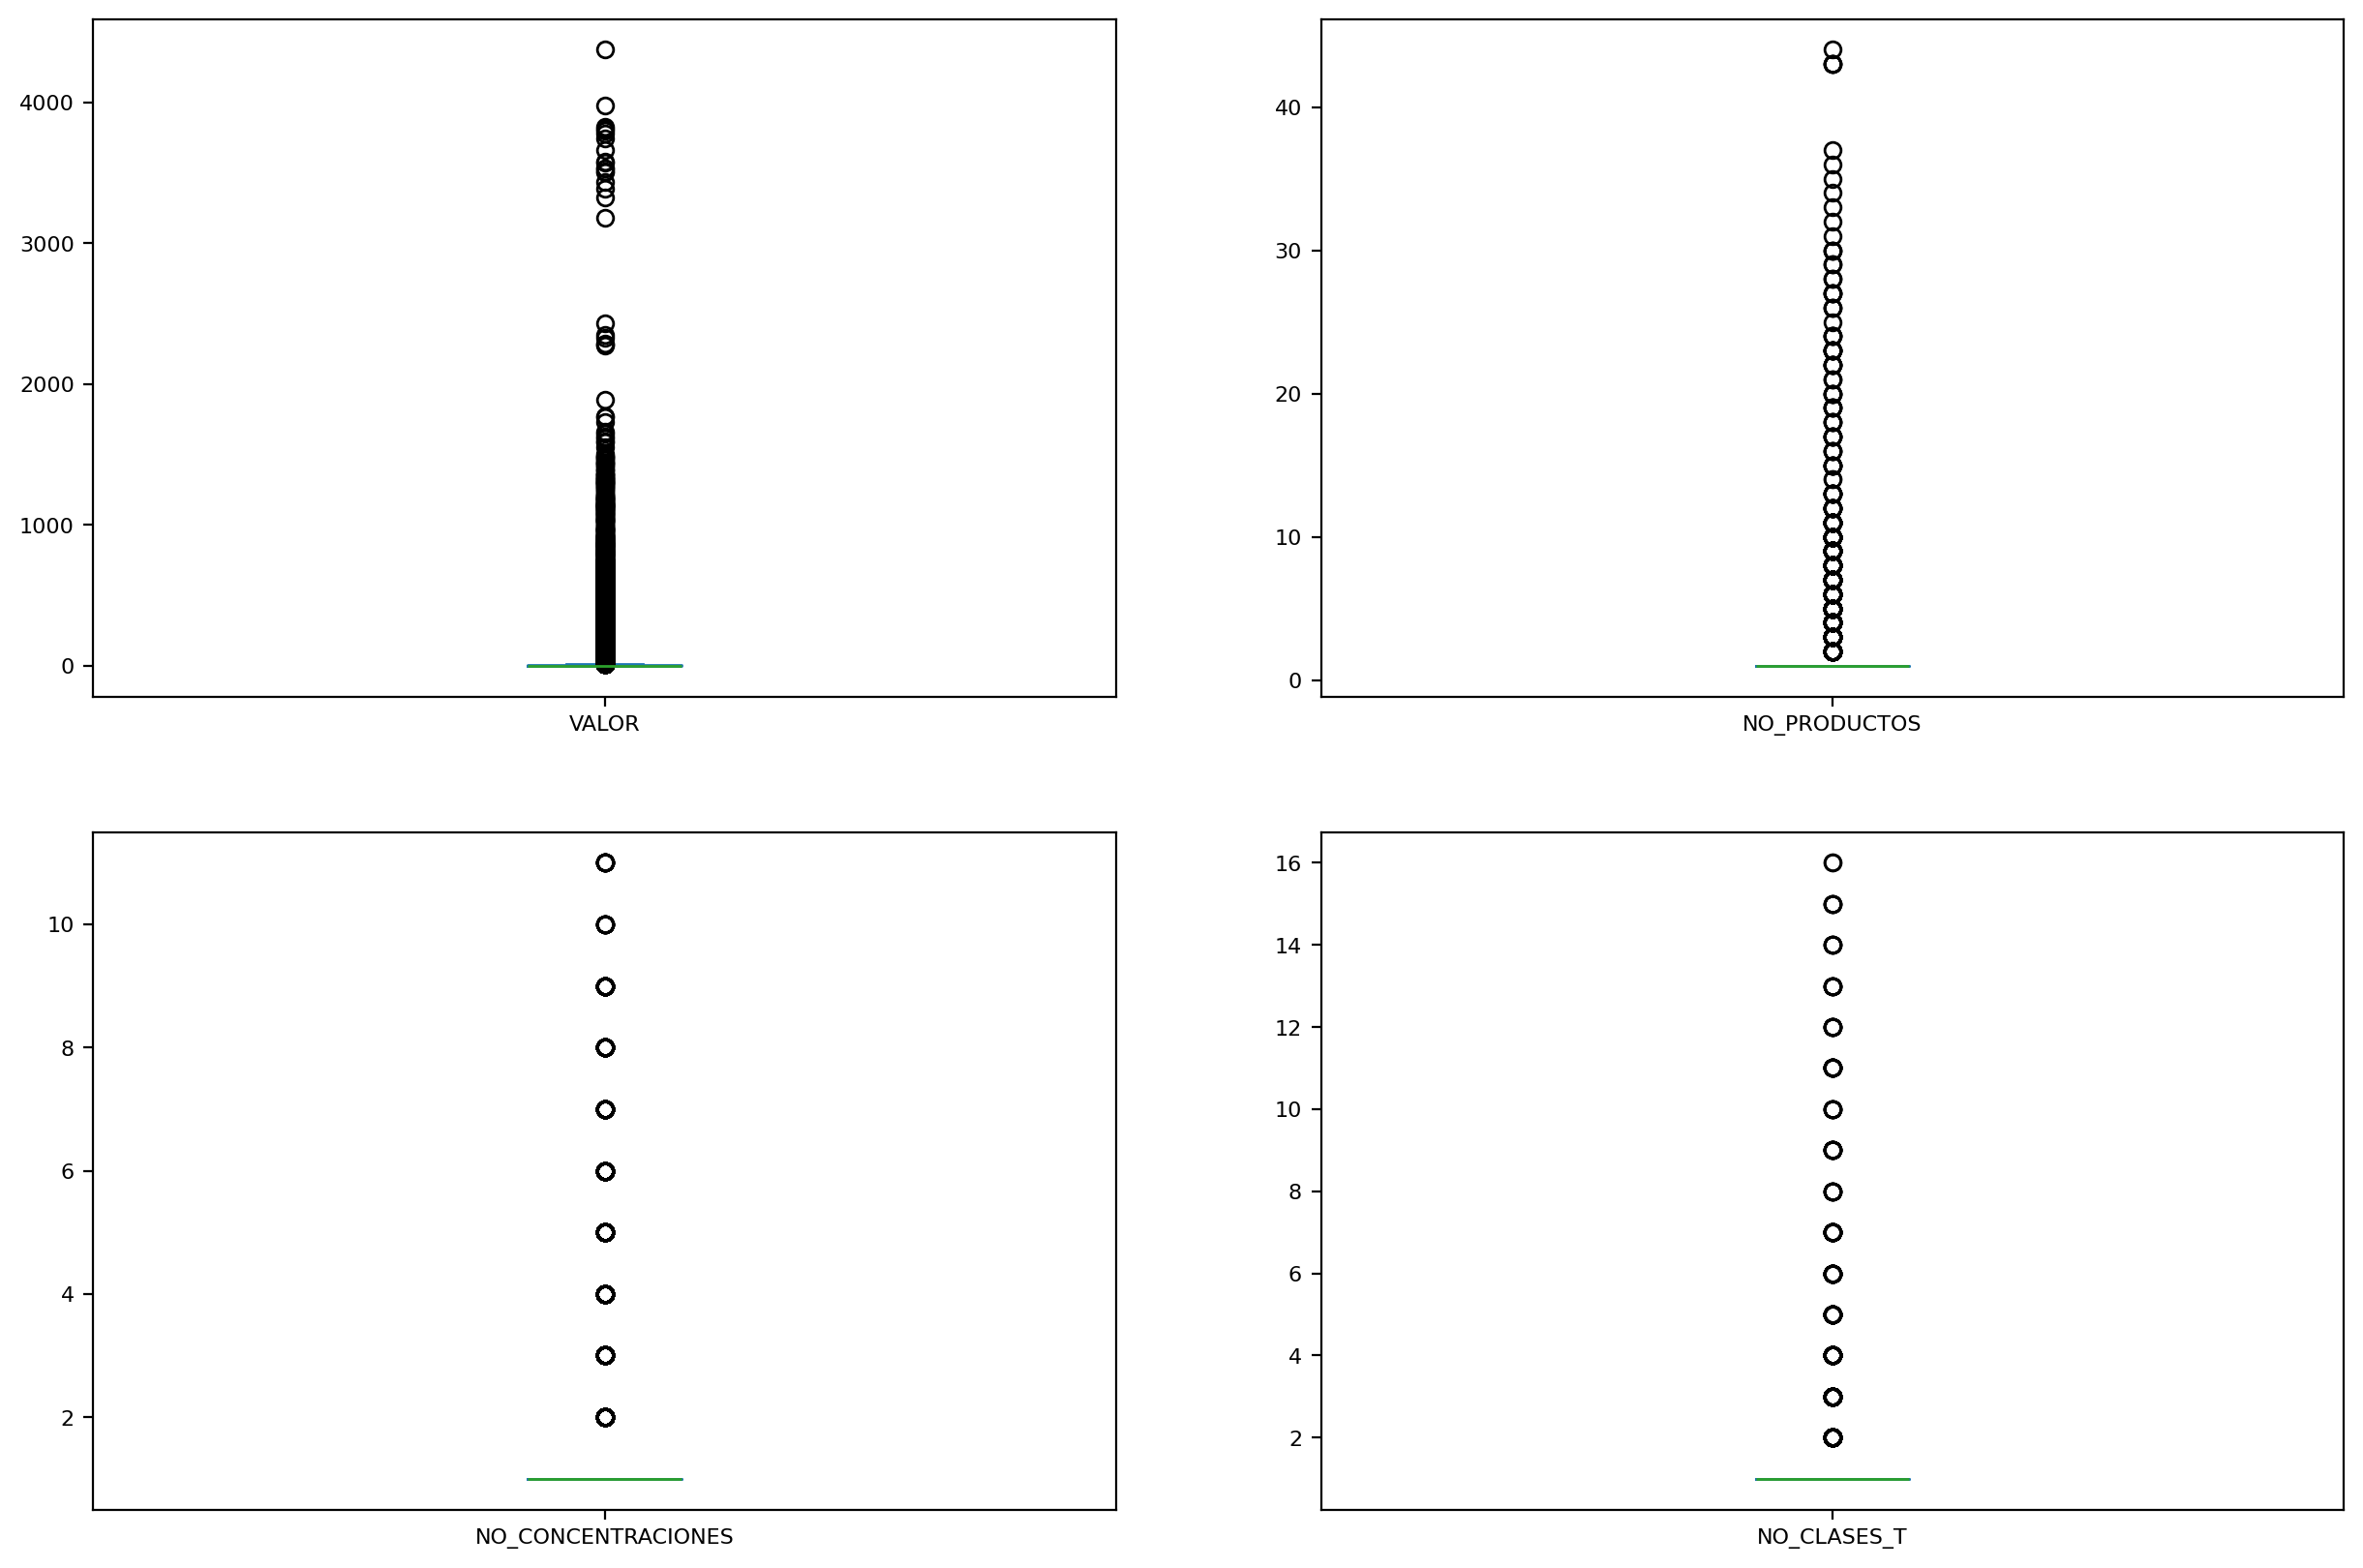

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
df_prescripciones[['VALOR', 'NO_PRODUCTOS', 'NO_CONCENTRACIONES', 'NO_CLASES_T']].plot.box(subplots=True, ax=axes)
plt.show()